<a href="https://colab.research.google.com/github/Manlikemurph/monkeys/blob/master/demo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%%capture
!wget "https://www.dropbox.com/s/lsxffhm26zbna41/Monkeys_Faces_Dataset.tar?dl=0" -O Monkeys_Faces_Dataset.tar  
!tar --warning=no-unknown-keyword -xzf Monkeys_Faces_Dataset.tar

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate

bs = 64  #batch size: if your GPU is running out of memory, set a smaller batch size, i.e 16
sz = 224 #image size
PATH = './Monkeys Faces/'

In [28]:
classes = []
for d in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, d)) and not d.startswith('.'):
        classes.append(d) 
print ("There are ", len(classes), "classes:\n", classes) 

There are  6 classes:
 ['Mandrill', 'Chimpanzee', 'Gorilla', 'Orungatun', 'Macaque', 'Gibbon']


In [0]:
for c in classes:
    print ("Class:", c)
    verify_images(os.path.join(PATH, c), delete=True);

In [30]:
data  = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=sz, bs=bs, valid_pct=0.2).normalize(imagenet_stats)
print ("There are", len(data.train_ds), "training images and", len(data.valid_ds), "validation images." )

There are 268 training images and 67 validation images.


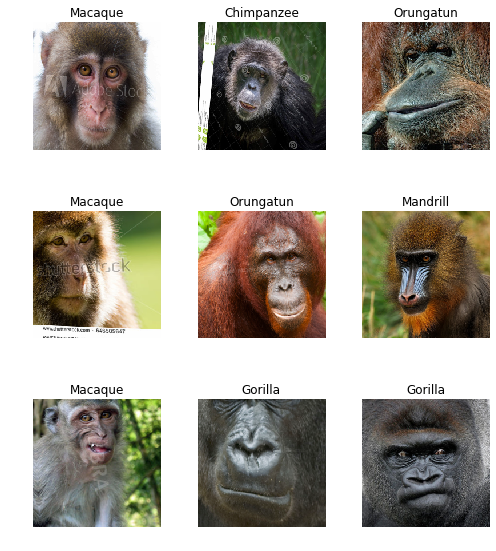

In [6]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [9]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,2.049481,0.957139,0.761194,00:14
1,1.240094,0.191753,0.970149,00:13
2,0.842941,0.110543,0.970149,00:13
3,0.639709,0.106106,0.970149,00:13


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

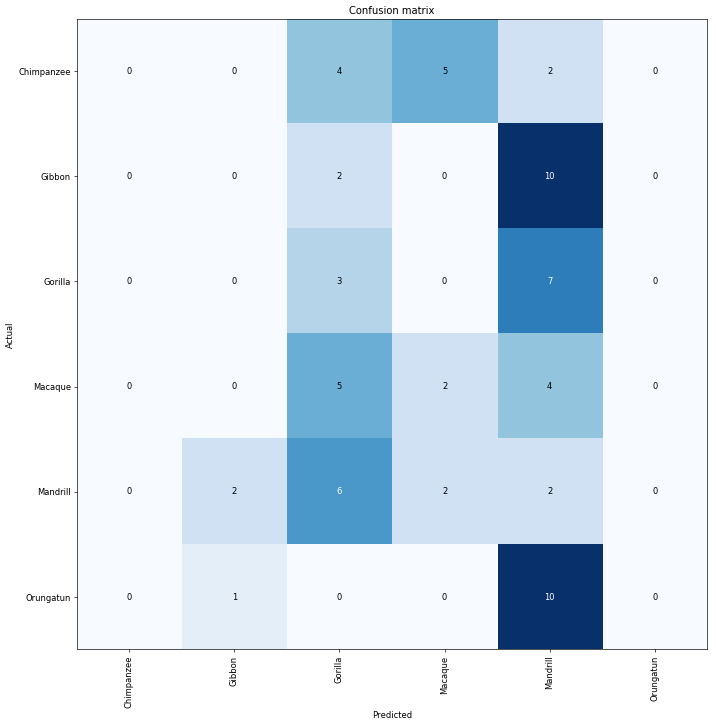

In [33]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

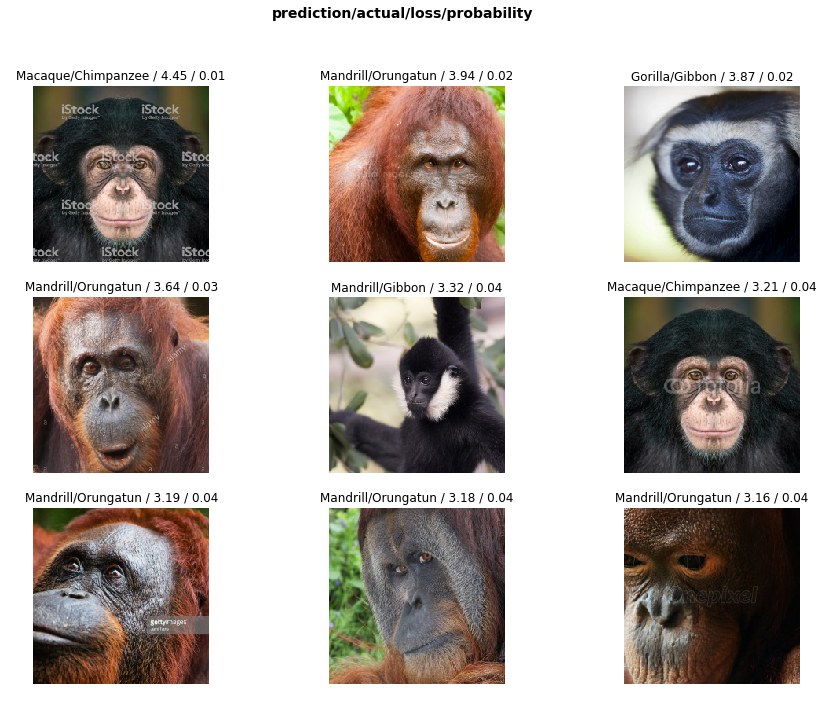

In [34]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=False)

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
path = "./content/por.jpg"
img = open_image(get_image_files(path)[0])
img.show()


FileNotFoundError: ignored